In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point

In [2]:
file_path = '/content/Suicide_bombing_attacks.csv'
data = pd.read_csv(file_path)

In [3]:
print(data.shape)

(988, 25)


In [4]:
print(data.head())

                      Date                   Islamic Date Blast Day Type  \
0  Sunday-November 19-1995  25 Jumaada al-THaany 1416 A.H        Holiday   
1   Monday-November 6-2000           10 SHa`baan 1421 A.H    Working Day   
2     Wednesday-May 8-2002              25 safar 1423 A.H    Working Day   
3      Friday-June 14-2002     3 Raby` al-THaany 1423 A.H    Working Day   
4       Friday-July 4-2003     4 Jumaada al-awal 1424 A.H    Working Day   

  Holiday Type         Time       City  Latitude Longitude     Province  \
0      Weekend          NaN  Islamabad   33.7180   73.0718      Capital   
1          NaN          NaN    Karachi   24.9918   66.9911        Sindh   
2          NaN      7:45 AM   Karachi    24.9918   66.9911        Sindh   
3          NaN  11:10:00 AM    Karachi   24.9918   66.9911        Sindh   
4          NaN          NaN     Quetta   30.2095   67.0182  Baluchistan   

                                            Location  ...  \
0                              

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type              9

In [6]:
print(data.describe())

         Latitude  Killed Min  Killed Max  Injured Min  No. of Suicide Blasts  \
count  983.000000   696.00000  988.000000   726.000000             824.000000   
mean    32.618279    14.79023   15.253138    31.498623               1.116505   
std      2.475619    17.61733   19.957268    38.656426               0.395625   
min     24.879503     0.00000    0.000000     0.000000               1.000000   
25%     31.823800     3.00000    3.000000     7.000000               1.000000   
50%     33.583300     8.00000    8.000000    20.000000               1.000000   
75%     34.004300    20.25000   18.000000    40.000000               1.000000   
max     35.383300   125.00000  148.000000   320.000000               4.000000   

       Temperature(C)  Temperature(F)  
count      978.000000      974.000000  
mean        21.093650       69.939612  
std          8.375656       15.081500  
min         -2.370000       27.734000  
25%         14.650000       58.282250  
50%         21.295000       70

In [7]:
print(data.columns)

Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')


In [8]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [9]:
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M %p', errors='coerce').dt.time

In [10]:
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')

In [11]:
data_cleaned = data.dropna(subset=['Longitude', 'Latitude'])

In [12]:
data['Explosive Weight (max)'] = data['Explosive Weight (max)'].str.extract('(\d+\.?\d*)').astype(float)

In [13]:
data['Killed Min'].fillna(0, inplace=True)
data['Injured Min'].fillna(0, inplace=True)

In [14]:
data['Killed Max'].fillna(data['Killed Min'], inplace=True)
data['Injured Max'] = pd.to_numeric(data['Injured Max'], errors='coerce')
data['Injured Max'].fillna(data['Injured Min'], inplace=True)

In [15]:
categorical_columns = ['Islamic Date', 'Blast Day Type', 'Holiday Type', 'Latitude', 'Longitude', 'Location',
                       'Open/Closed Space', 'Influencing Event/Event', 'Targeted Sect if any', 'No. of Suicide Blasts',
                       'Hospital Names']
for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)

In [16]:
data['Temperature(C)'].fillna(data['Temperature(C)'].mean(), inplace=True)
data['Temperature(F)'].fillna(data['Temperature(F)'].mean(), inplace=True)

In [17]:
data['Time'] = data['Time'].fillna('Unknown')

In [18]:
missing_values_after = data.isnull().sum()

In [19]:
cleaned_data_info = data.info()
missing_values_after = data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     904 non-null    datetime64[ns]
 1   Islamic Date             988 non-null    object        
 2   Blast Day Type           988 non-null    object        
 3   Holiday Type             988 non-null    object        
 4   Time                     988 non-null    object        
 5   City                     988 non-null    object        
 6   Latitude                 988 non-null    object        
 7   Longitude                988 non-null    object        
 8   Province                 988 non-null    object        
 9   Location                 988 non-null    object        
 10  Location Category        988 non-null    object        
 11  Location Sensitivity     988 non-null    object        
 12  Open/Closed Space        988 non-nul

In [20]:
print(cleaned_data_info)
print(missing_values_after)

None
Date                        84
Islamic Date                 0
Blast Day Type               0
Holiday Type                 0
Time                         0
City                         0
Latitude                     0
Longitude                    0
Province                     0
Location                     0
Location Category            0
Location Sensitivity         0
Open/Closed Space            0
Influencing Event/Event      0
Target Type                  0
Targeted Sect if any         0
Killed Min                   0
Killed Max                   0
Injured Min                  0
Injured Max                  0
No. of Suicide Blasts        0
Explosive Weight (max)     647
Hospital Names               0
Temperature(C)               0
Temperature(F)               0
dtype: int64


<ipython-input-21-6b6c6b479d27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year.astype(int)


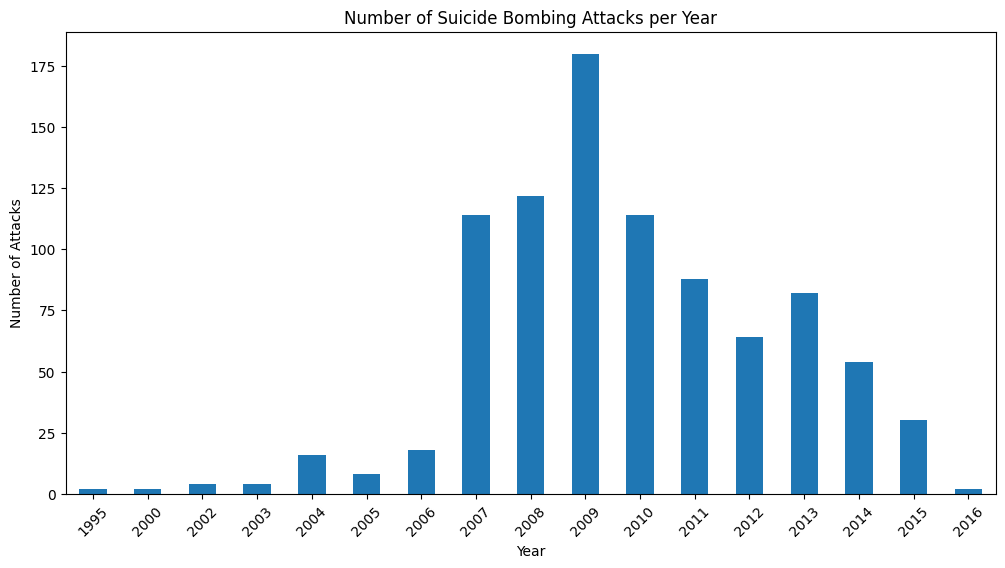

In [21]:
data = data.dropna(subset=['Date'])

data['Year'] = data['Date'].dt.year.astype(int)

attacks_per_year = data.groupby('Year').size()

plt.figure(figsize=(12, 6))
attacks_per_year.plot(kind='bar')
plt.title('Number of Suicide Bombing Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

plt.xticks(range(len(attacks_per_year.index)), attacks_per_year.index, rotation=45)
plt.show()

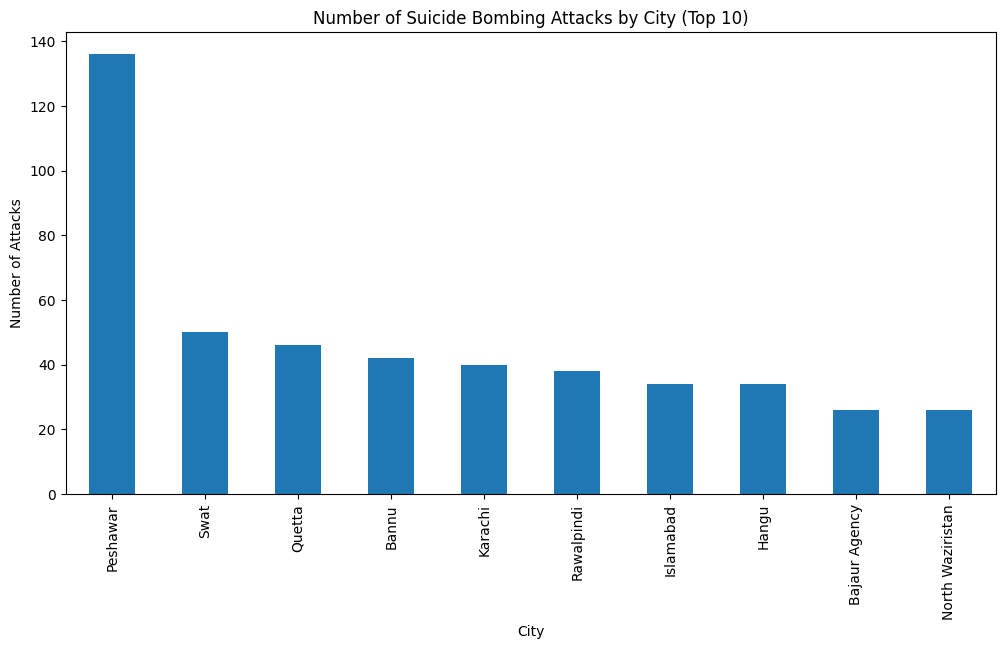

In [22]:
attacks_by_city = data['City'].value_counts().head(10)

plt.figure(figsize=(12, 6))
attacks_by_city.plot(kind='bar')
plt.title('Number of Suicide Bombing Attacks by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Attacks')
plt.show()

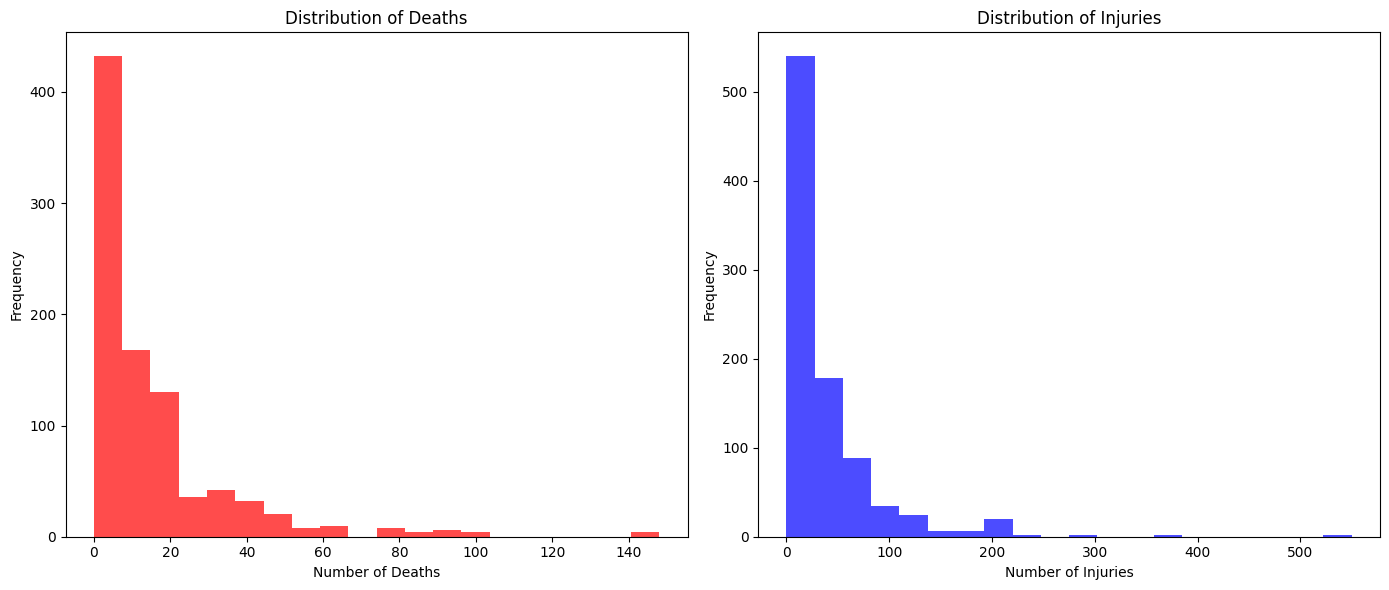

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

data['Killed Max'].plot(kind='hist', bins=20, ax=ax[0], color='red', alpha=0.7)
ax[0].set_title('Distribution of Deaths')
ax[0].set_xlabel('Number of Deaths')

data['Injured Max'].plot(kind='hist', bins=20, ax=ax[1], color='blue', alpha=0.7)
ax[1].set_title('Distribution of Injuries')
ax[1].set_xlabel('Number of Injuries')

plt.tight_layout()
plt.show()

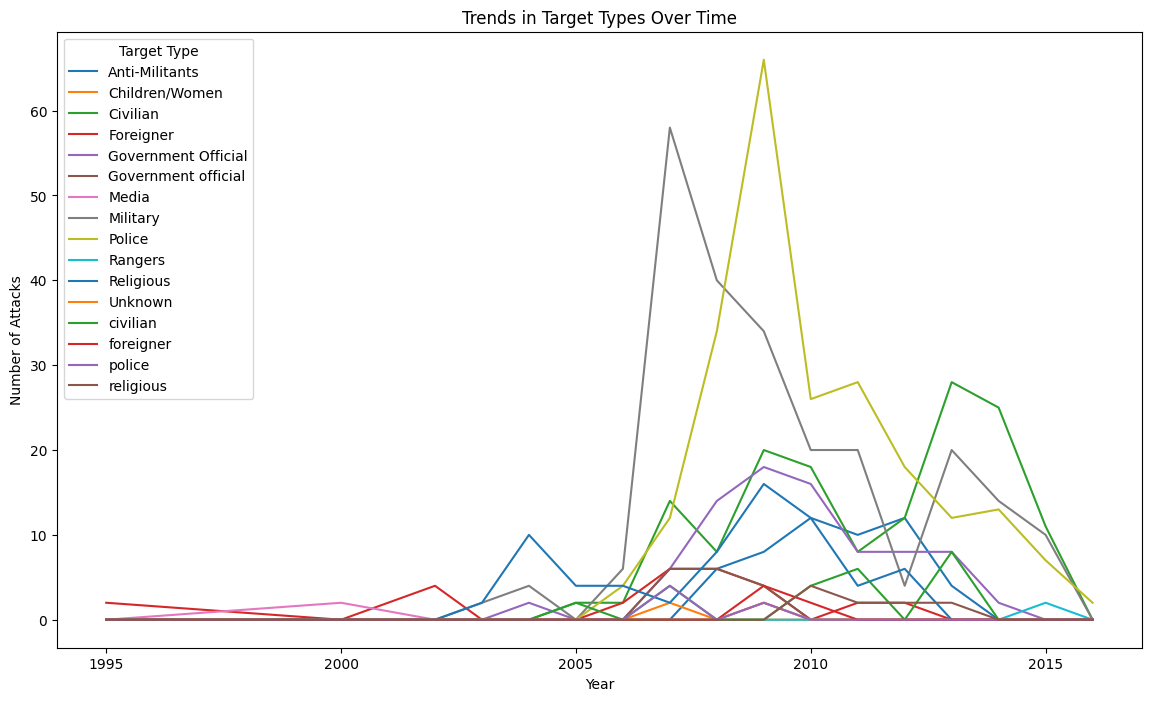

In [28]:
target_trends = data.groupby(['Year', 'Target Type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
target_trends.plot(kind='line', ax=plt.gca())
plt.title('Trends in Target Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Target Type')
plt.show()

In [29]:
data_clean = data.dropna(subset=['Longitude', 'Latitude'])

In [30]:
data_clean['Longitude'] = pd.to_numeric(data_clean['Longitude'], errors='coerce')
data_clean['Latitude'] = pd.to_numeric(data_clean['Latitude'], errors='coerce')

In [31]:
data_clean = data_clean.dropna(subset=['Longitude', 'Latitude'])

In [32]:
geometry = [Point(xy) for xy in zip(data_clean['Longitude'], data_clean['Latitude'])]
geo_df = gpd.GeoDataFrame(data_clean, geometry=geometry)

<ipython-input-33-c0ce4f72d096>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


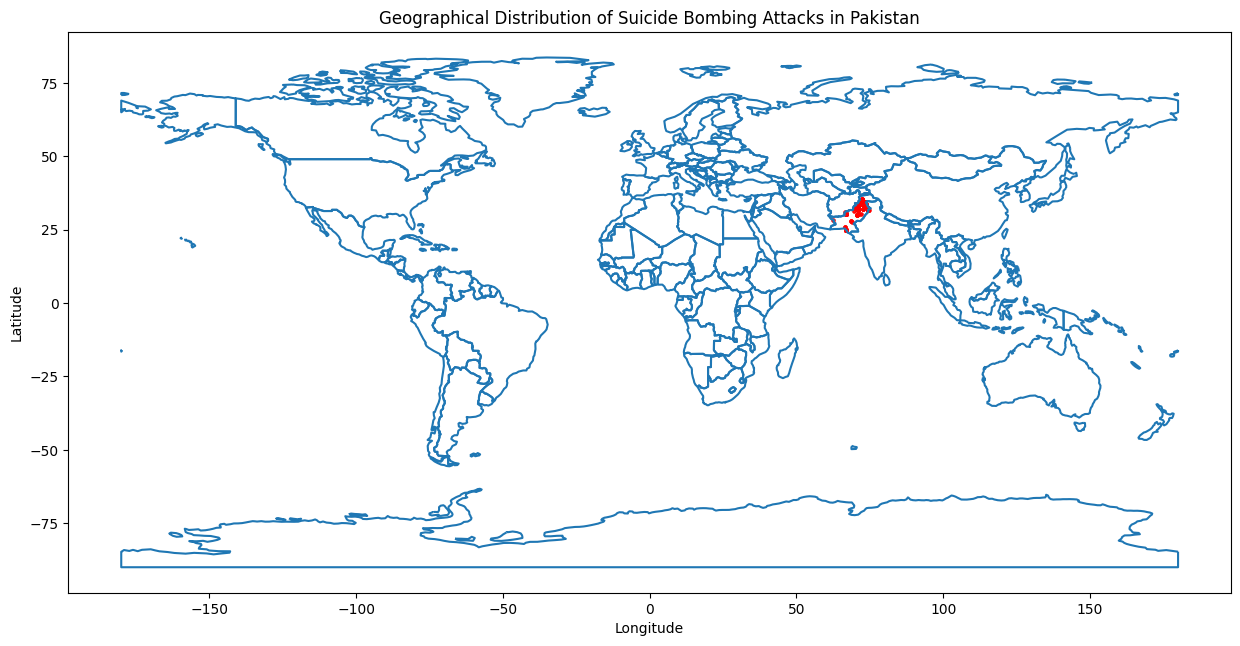

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
geo_df.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7)
plt.title('Geographical Distribution of Suicide Bombing Attacks in Pakistan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

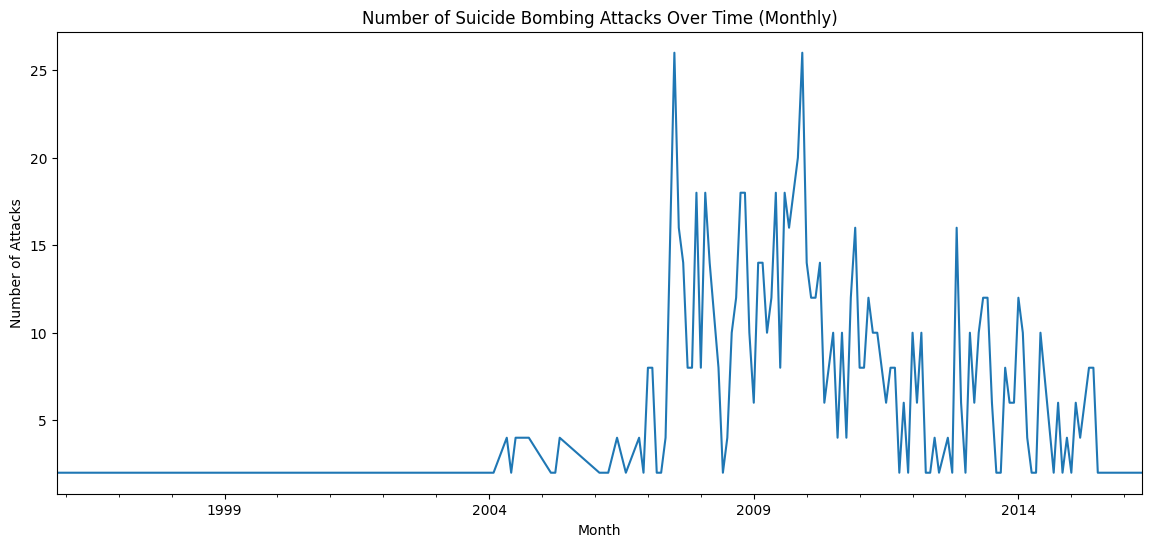

In [34]:
data['Month'] = data['Date'].dt.to_period('M')
attacks_per_month = data.groupby('Month').size()

plt.figure(figsize=(14, 6))
attacks_per_month.plot(kind='line')
plt.title('Number of Suicide Bombing Attacks Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()

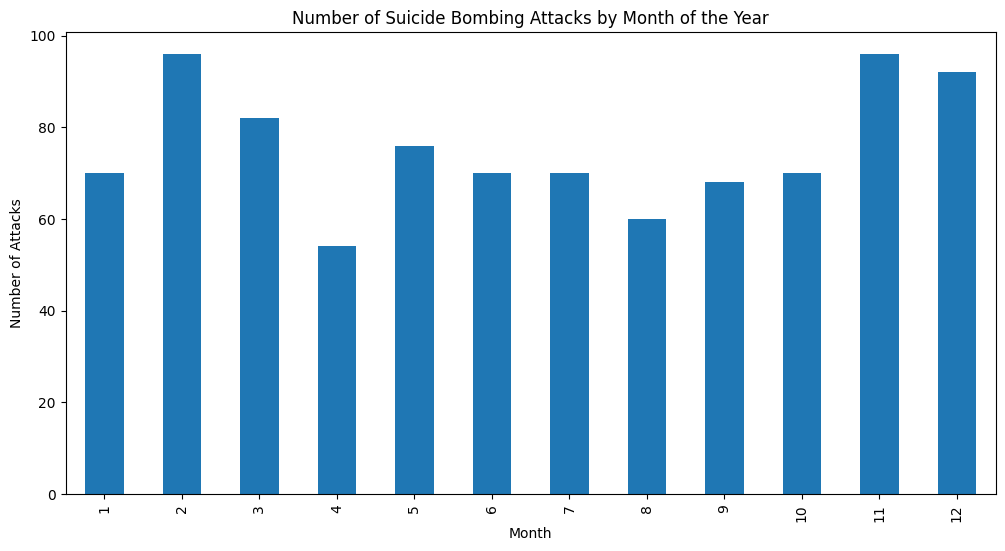

In [35]:
data['Month_of_Year'] = data['Date'].dt.month
attacks_by_month = data['Month_of_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
attacks_by_month.plot(kind='bar')
plt.title('Number of Suicide Bombing Attacks by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()

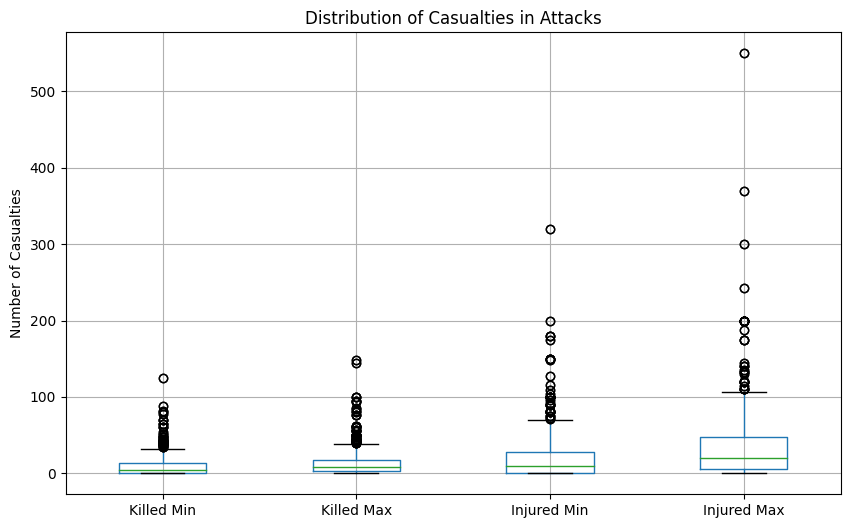

In [36]:
plt.figure(figsize=(10, 6))
data[['Killed Min', 'Killed Max', 'Injured Min', 'Injured Max']].boxplot()
plt.title('Distribution of Casualties in Attacks')
plt.ylabel('Number of Casualties')
plt.xticks([1, 2, 3, 4], ['Killed Min', 'Killed Max', 'Injured Min', 'Injured Max'])
plt.grid(True)
plt.show()

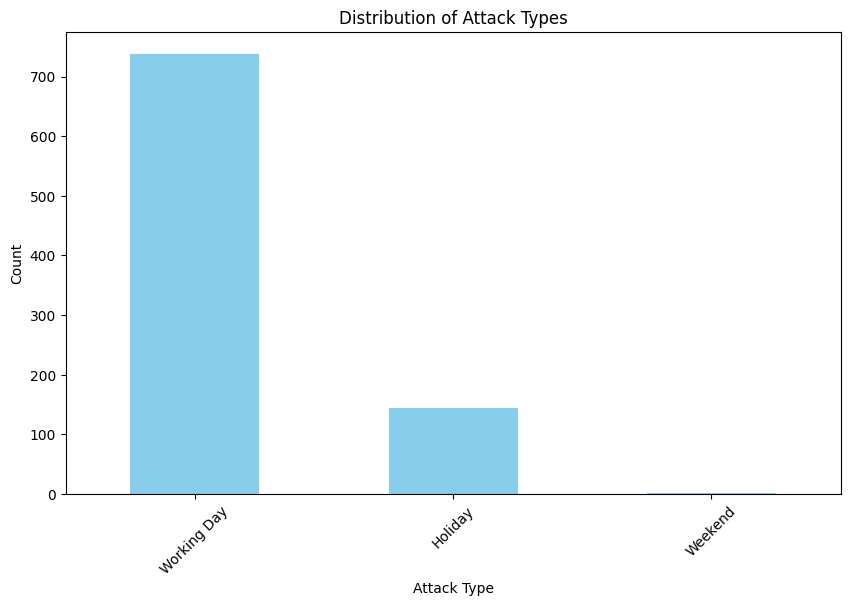

In [37]:
data_filtered = data[data['Blast Day Type'] != 'Unknown']

plt.figure(figsize=(10, 6))
data_filtered['Blast Day Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

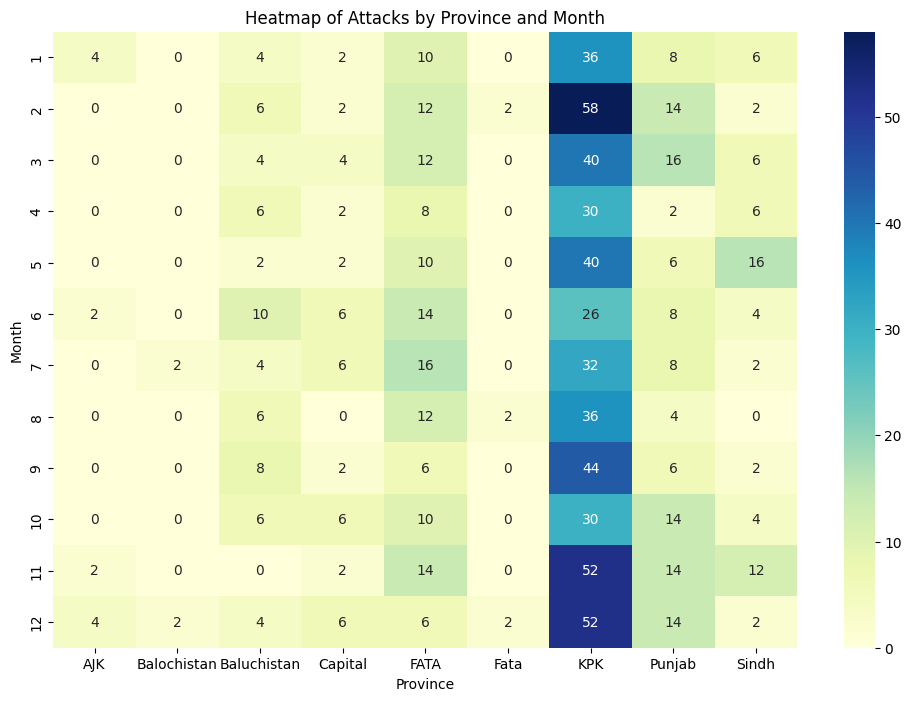

In [38]:
pivot_table = data.pivot_table(index=data['Date'].dt.month, columns='Province', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Attacks by Province and Month')
plt.xlabel('Province')
plt.ylabel('Month')
plt.show()

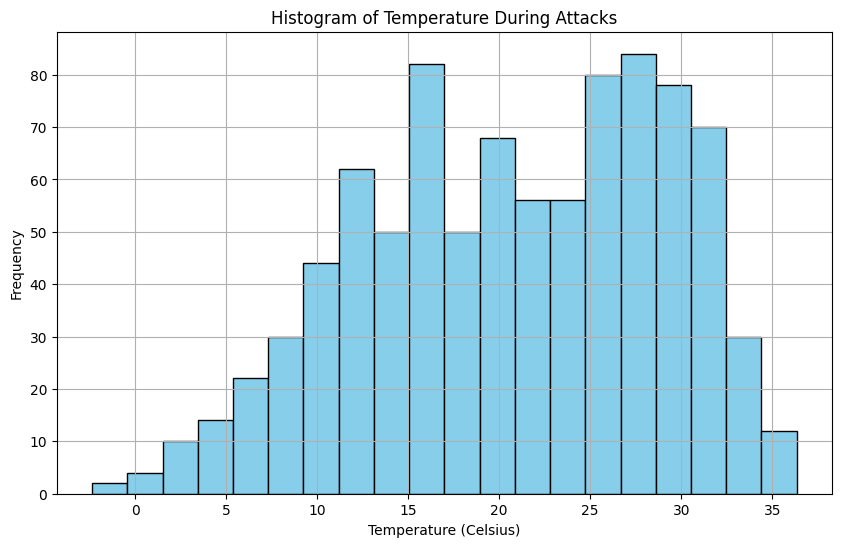

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(data['Temperature(C)'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Temperature During Attacks')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

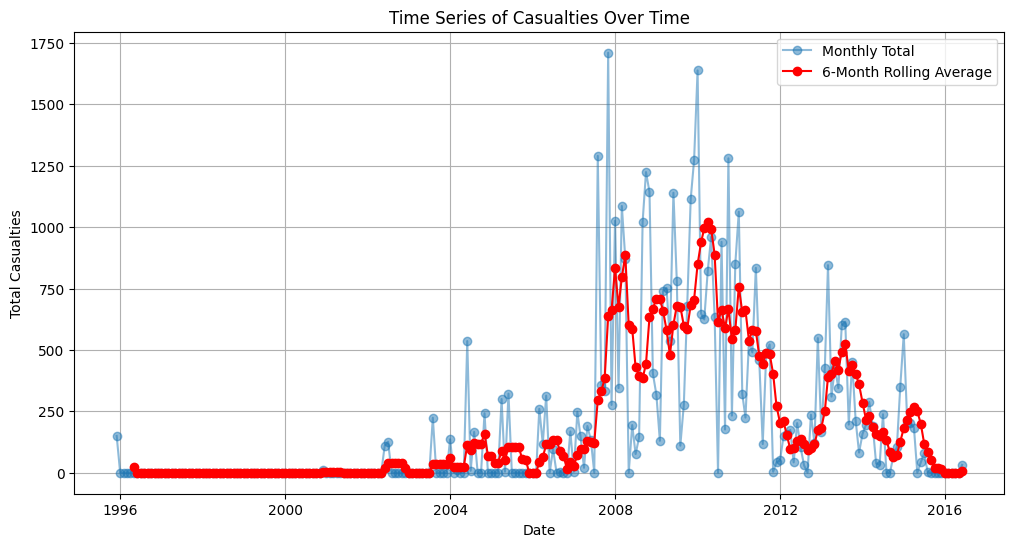

In [40]:
data['Date'] = pd.to_datetime(data['Date'])

data['Total Casualties'] = data['Killed Max'] + data['Injured Max']

data_numeric = data[['Date', 'Total Casualties']]

monthly_data = data_numeric.resample('M', on='Date').sum()

monthly_data['Rolling Average Casualties'] = monthly_data['Total Casualties'].rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Total Casualties'], marker='o', linestyle='-', alpha=0.5, label='Monthly Total')
plt.plot(monthly_data.index, monthly_data['Rolling Average Casualties'], marker='o', linestyle='-', color='red', label='6-Month Rolling Average')
plt.title('Time Series of Casualties Over Time')
plt.xlabel('Date')
plt.ylabel('Total Casualties')
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1200x1000 with 0 Axes>

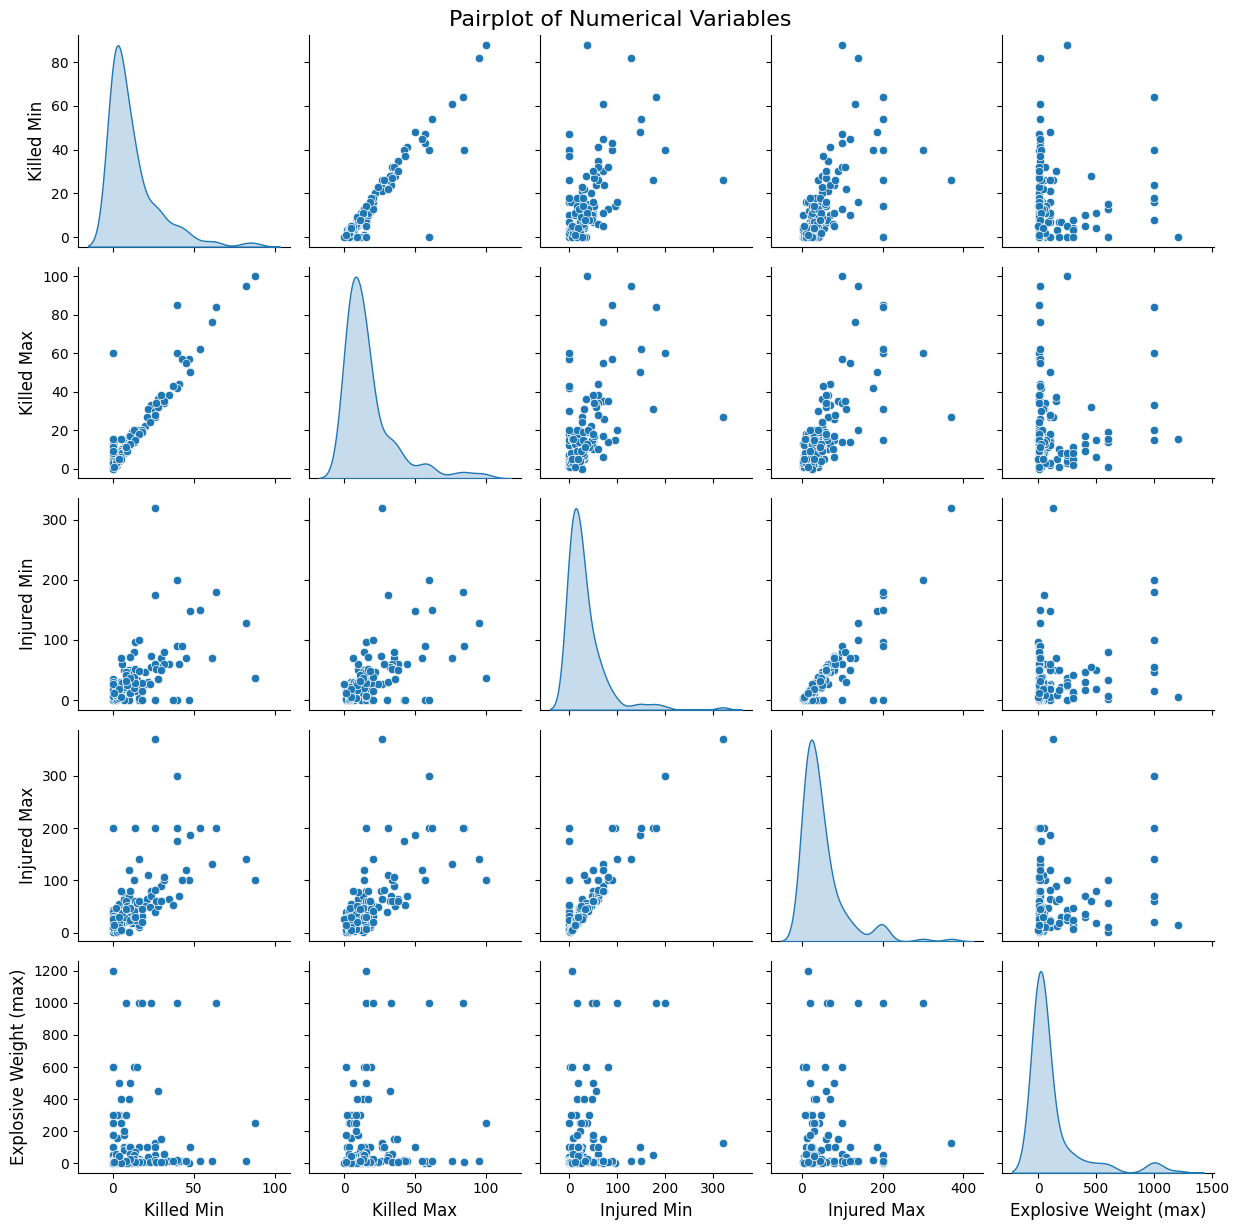

In [41]:
num_cols = ['Killed Min', 'Killed Max', 'Injured Min', 'Injured Max', 'Explosive Weight (max)']

plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(data[num_cols].dropna(), diag_kind='kde')

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12)

plt.suptitle('Pairplot of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

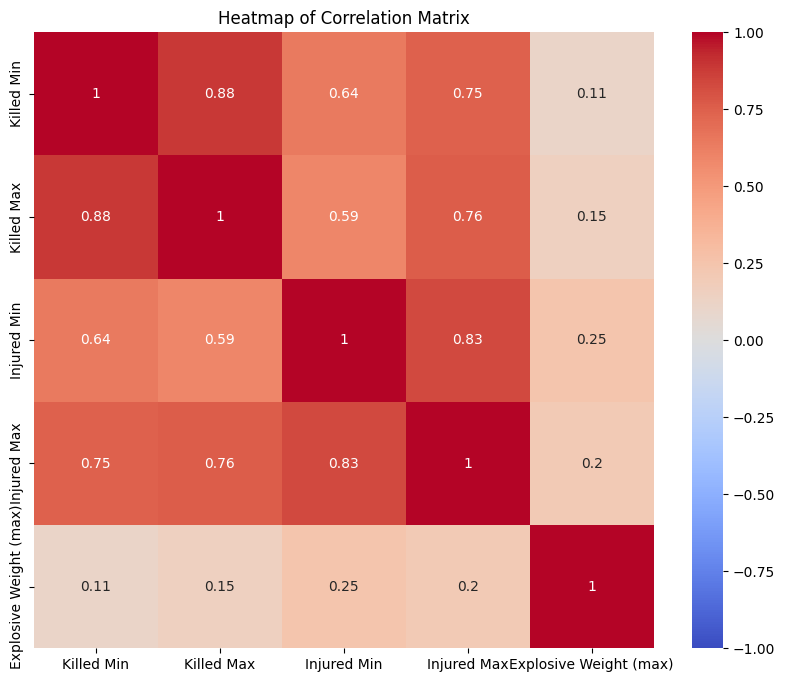

In [42]:
num_cols = ['Killed Min', 'Killed Max', 'Injured Min', 'Injured Max', 'Explosive Weight (max)']

plt.figure(figsize=(10, 8))
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

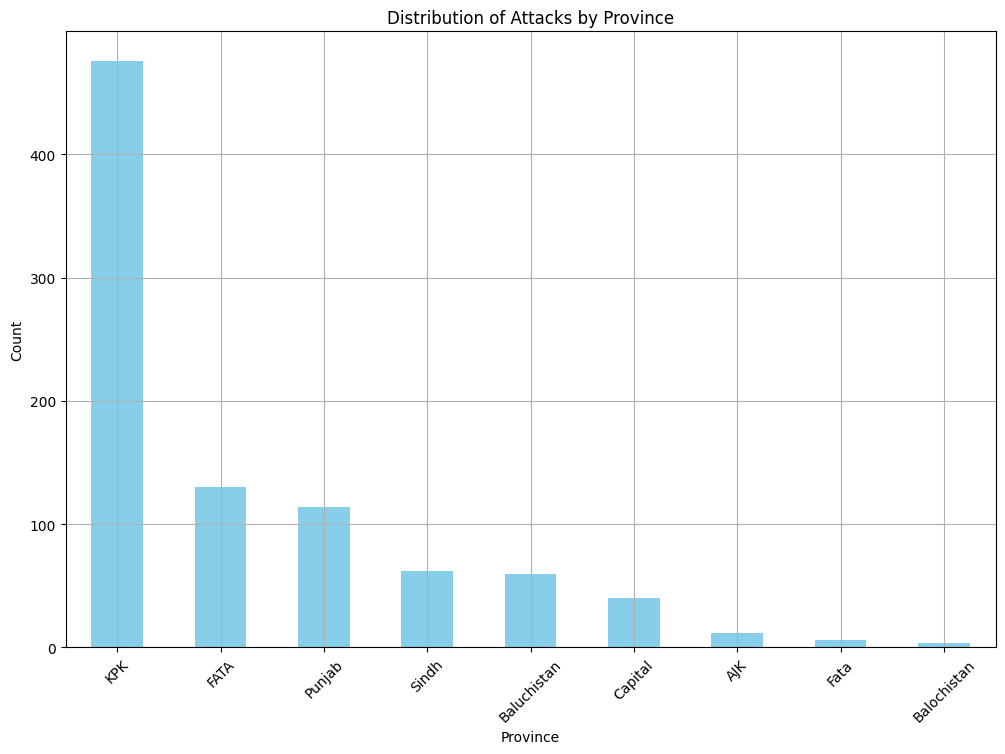

In [43]:
plt.figure(figsize=(12, 8))
data['Province'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Attacks by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [44]:
sorted_open_closed_space = data['Open/Closed Space'].value_counts().sort_values(ascending=False)

fig = px.pie(sorted_open_closed_space, names=sorted_open_closed_space.index, values=sorted_open_closed_space.values)
fig.update_layout(title='Open/Closed Space Distribution')
fig.show()

In [45]:
targeted_sect_year_counts = data.groupby(['Year', 'Targeted Sect if any']).size().reset_index(name='Counts')

fig = px.bar(targeted_sect_year_counts, x='Year', y='Counts', color='Targeted Sect if any',
             title='Stacked Bar Chart of Targeted Sects Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Attacks', legend_title='Targeted Sect')
fig.show()

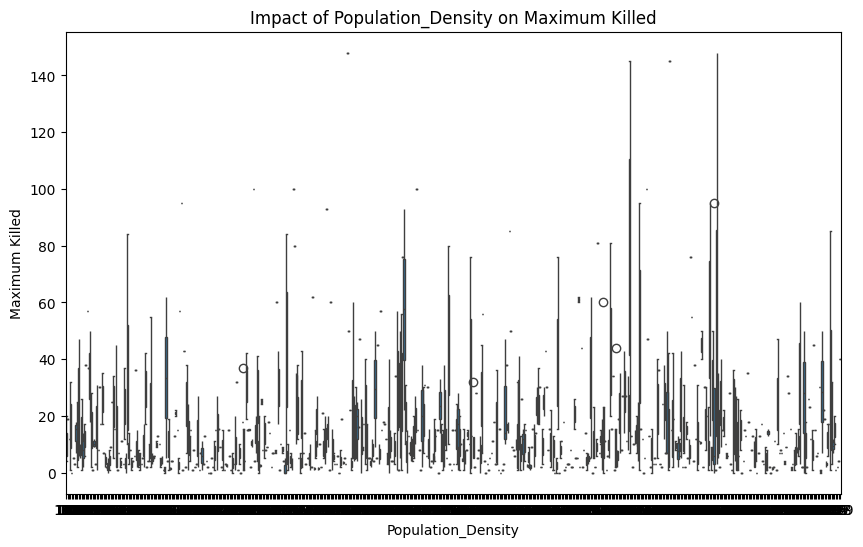

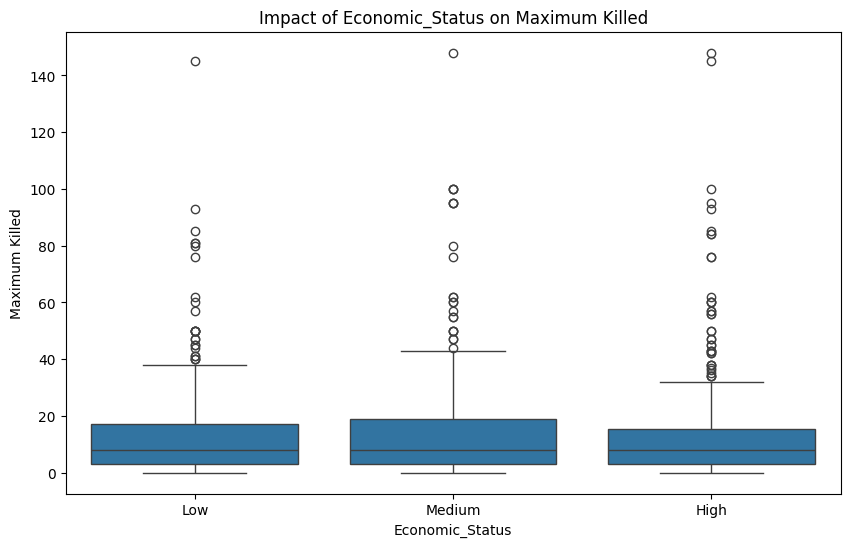

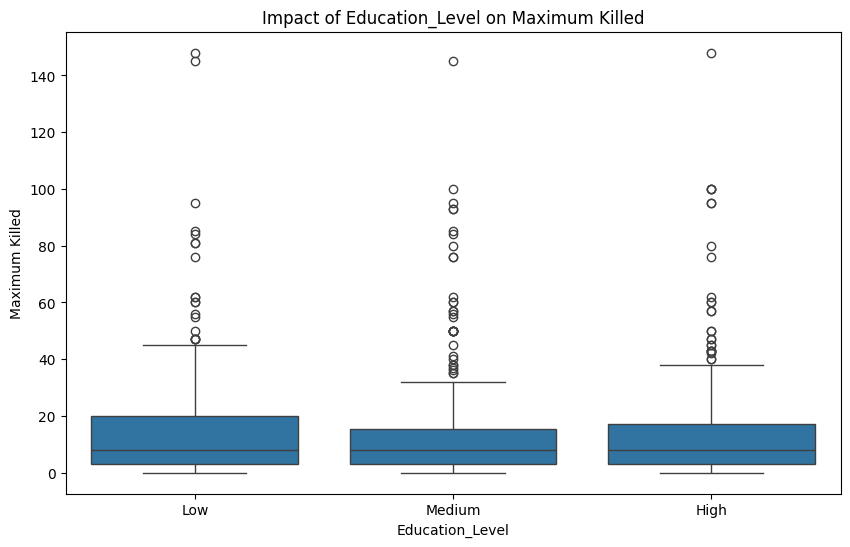

In [46]:
data['Population_Density'] = np.random.randint(100, 1000, size=data.shape[0])
data['Economic_Status'] = np.random.choice(['Low', 'Medium', 'High'], size=data.shape[0])
data['Education_Level'] = np.random.choice(['Low', 'Medium', 'High'], size=data.shape[0])

demographic_factors = ['Population_Density', 'Economic_Status', 'Education_Level']
for factor in demographic_factors:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=factor, y='Killed Max', data=data)
    plt.title(f'Impact of {factor} on Maximum Killed')
    plt.xlabel(factor)
    plt.ylabel('Maximum Killed')
    plt.show()

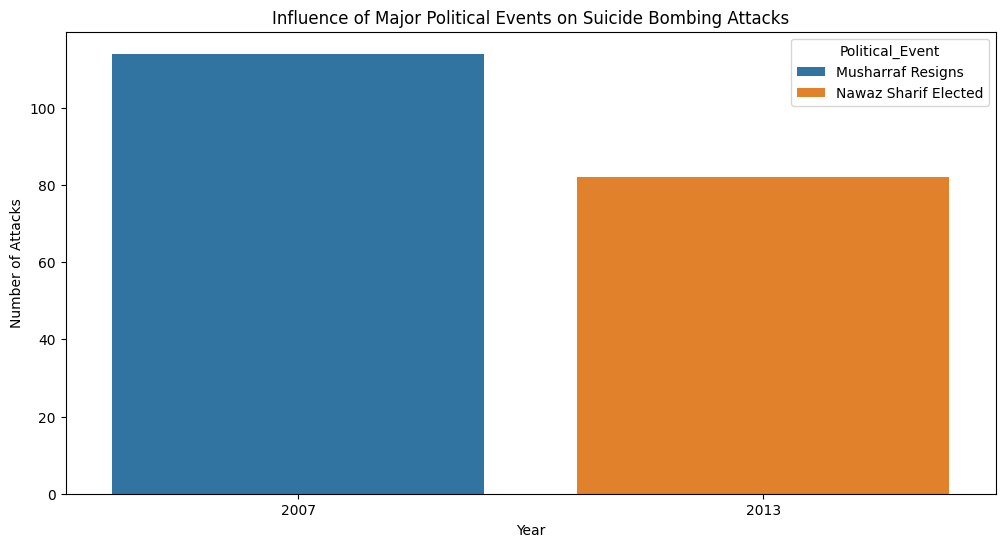

In [47]:
data['Political_Event'] = 'None'
major_events = {2007: 'Musharraf Resigns', 2013: 'Nawaz Sharif Elected', 2018: 'Imran Khan Elected'}
data['Political_Event'] = data['Year'].map(major_events).fillna('None')

events_analysis = data.groupby(['Year', 'Political_Event']).size().reset_index(name='Counts')
events_analysis = events_analysis[events_analysis['Political_Event'] != 'None']

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Counts', hue='Political_Event', data=events_analysis)
plt.title('Influence of Major Political Events on Suicide Bombing Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

In [48]:
gdf = gpd.GeoDataFrame(data_cleaned, geometry=gpd.points_from_xy(data_cleaned['Longitude'], data_cleaned['Latitude']))

In [49]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
pakistan = world[world.name == 'Pakistan']

<ipython-input-49-5460969f7a32>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



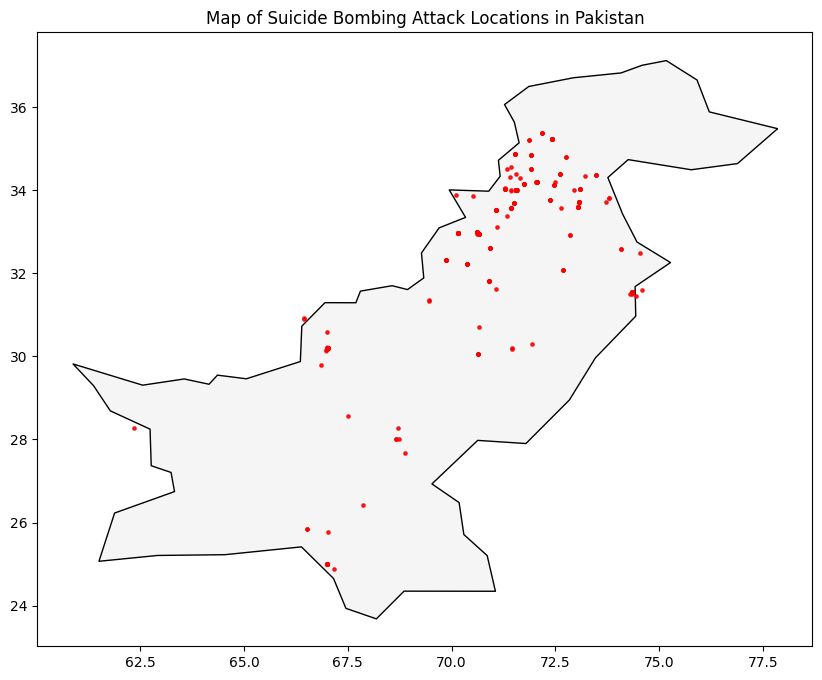

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
pakistan.plot(ax=ax, color='whitesmoke', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6)
plt.title('Map of Suicide Bombing Attack Locations in Pakistan')
plt.show()

In [51]:
hotspots = gdf.geometry.apply(lambda x: x.coords[0]).value_counts().nlargest(10)
print("Hotspots (Top 10 locations with the highest frequency of attacks):")
print(hotspots)

Hotspots (Top 10 locations with the highest frequency of attacks):
geometry
(71.5448, 34.0043)    142
(70.1456, 32.9746)     74
(66.9911, 24.9918)     56
(72.4258, 35.2227)     54
(67.0182, 30.2095)     50
(73.0718, 33.718)      40
(74.3407, 31.5451)     40
(73.0437, 33.6058)     36
(71.0713, 33.5351)     34
(70.9095, 31.8238)     28
Name: count, dtype: int64
